In [3]:
from model import *

In [32]:
param_set = pickle.load(open('optimal.param', 'rb'))

In [33]:
param_set

{'set': {'i_thres': 5000.0,
  't_ltp': 1200.0,
  't_refrac': 800.0,
  't_leak': 800.0,
  't_inhibit': 1000,
  'w_min': 1,
  'w_max': 1000,
  'a_dec': 50,
  'a_inc': 150,
  'randmut': 0.001},
 'score': 121.31135133846634}

In [21]:
model, timer = init_model(learn = True, structure = [7,])
traces = [random.choice(Defaults.files) for _ in range(500)]
model.set_param_set(param_set['set'])
model.set_random_weights()
start_time = time.time()
for trace in traces:
    model.feed.load(trace)
    while frame:=model.next():
            model.teacher.output = [1 if n == Defaults.files.index(trace) else 1j
                                    for n in range(7)]
end_time = time.time()
print(end_time-start_time)

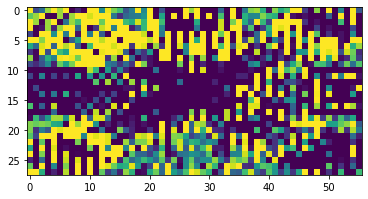

In [24]:
model.save_attention_maps('.')

In [31]:
import imageio as iio

model.learn = False
model.feed.load("resources//out.bin")

arrows = pickle.load(open('resources\\arrows.bin', 'rb'))
white_square = np.multiply(np.ones((28,28)), 255)
current_frame = np.copy(white_square)
current_arrow = np.copy(white_square)
frames = []
frames_shown = 0

while frame := model.next():
    if 1 in frame:
        frames_shown = 0
        current_arrow = arrows[frame.index(1)]
    if frames_shown > 50:
        current_arrow = np.copy(white_square)
    data = model.raw_data
    synapse = model.feed.parse_aer(data)[0][0]
    x_coord = int(synapse[0:2], base=16)
    y_coord = int(synapse[2:4], base=16)
    color = (synapse[4] == '0') * 255
    current_frame[y_coord][x_coord] = color
    frames.append(np.concatenate((current_frame, current_arrow)).astype(np.uint8))
    frames_shown += 1

iio.mimwrite('animation2.gif', frames, fps=60)